In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/trainEmotions.csv')
print(train_data.shape)
train_data.head(20)

(14504, 2)


,emotion,content
0,happiness,victory for the bulldogs was celebrated by 3 w...
1,happiness,"@saraLDS Thanks for that, Sara"
2,happiness,@Tony_Mandarich well welcome back from the dar...
3,happiness,"@sai_shediddy lol , you gotta share too"
4,happiness,"first up, make up for lost time with jelly. Ja..."
5,happiness,@redrobinrockn next one for you!
6,happiness,Welcome @doeko ! Really glad to know you here....
7,happiness,"is happy and clean, squeaky clean"
8,happiness,"@Tottie Thank you, thank you!! Thought this is..."
9,happiness,"@aruky Yes, this NBA song is great!!! Got an ..."


happiness    5430
neutral      5182
sadness      3892
Name: emotion, dtype: int64


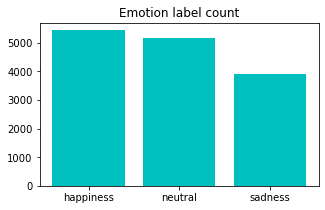

In [3]:
emotion_counts = train_data.emotion.value_counts()
print(emotion_counts)
plt.figure(figsize=(5,3))
plt.title('Emotion label count')
plt.bar(emotion_counts.keys(), emotion_counts.values, color='c')
plt.show()

In [4]:
train_data['content_length'] = train_data.content.apply(lambda x:len(x))
train_data['word_count'] = train_data.content.apply(lambda x:len(x.split(' ')))
train_data.head(10)

,emotion,content,content_length,word_count
0,happiness,victory for the bulldogs was celebrated by 3 w...,100,17
1,happiness,"@saraLDS Thanks for that, Sara",30,5
2,happiness,@Tony_Mandarich well welcome back from the dar...,53,8
3,happiness,"@sai_shediddy lol , you gotta share too",39,7
4,happiness,"first up, make up for lost time with jelly. Ja...",119,24
5,happiness,@redrobinrockn next one for you!,32,5
6,happiness,Welcome @doeko ! Really glad to know you here....,68,13
7,happiness,"is happy and clean, squeaky clean",34,7
8,happiness,"@Tottie Thank you, thank you!! Thought this is...",96,19
9,happiness,"@aruky Yes, this NBA song is great!!! Got an ...",126,21


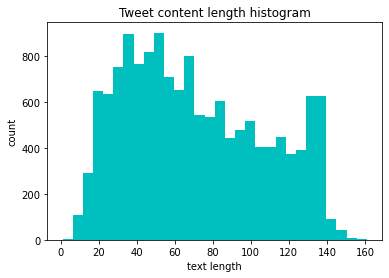

In [5]:
plt.figure()
plt.title('Tweet content length histogram')
plt.hist(train_data.content_length, bins=30, color='c')
plt.xlabel('text length')
plt.ylabel('count')
plt.show()

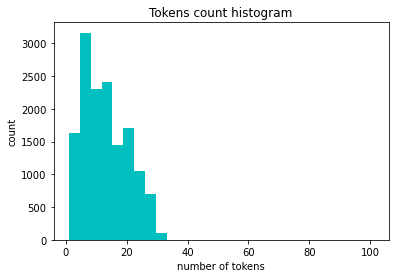

In [6]:
plt.figure()
plt.title('Tokens count histogram')
plt.hist(train_data.word_count, bins=28, color='c')
plt.xlabel('number of tokens')
plt.ylabel('count')
plt.show()

In [7]:
import re

In [8]:
s = train_data.content[2] + ' '  + train_data.content[1]
s

'@Tony_Mandarich well welcome back from the dark side! @saraLDS Thanks for that, Sara'

In [9]:
# Tags removal
re.sub(r'@[^\s]+', '', s)

' well welcome back from the dark side!  Thanks for that, Sara'

Since 3+ dots might have some sentiment value, we want to keep them

In [10]:
THREE_DOTS_TOKEN = '3NEKUDOT'
s = 'well. well.. well... well....... well.............'
re.sub(r'\.{3,}', ' ' + THREE_DOTS_TOKEN + ' ', s)

'well. well.. well 3NEKUDOT  well 3NEKUDOT  well 3NEKUDOT '

In [11]:
re.findall(r'[\W]{3,}', 'you are a piece of %^&*@#')

[' %^&*@#']

In [12]:
train_data['blahblah'] = train_data.content.apply(lambda x: len(re.findall(r'[^a-zA-Z0-9\s!?.]{3,}', x)))

In [13]:
train_data['blahblah'].value_counts()

0    13507
1      921
2       57
3        8
4        4
5        3
9        1
6        1
7        1
8        1
Name: blahblah, dtype: int64

Maybe we can find a list of known smiles and use them for happy / sad symbols

In [14]:
s = train_data[train_data['blahblah'] > 1].content.iloc[10]
s

'@se7en.up cï¿½m on anh  ko the chiu no~i noi nhï¿½ Tifa roi :-D, thang Cloud danh dam gi mac ke no :&quot;&gt;'

In [15]:
# Remoe links
re.sub(r'(?:(?:https?|ftp):\/\/)?[\w\/\-?=%.]+\.[\w\/\-&?=%.]+', ' ', s)

'@  cï¿½m on anh  ko the chiu no~i noi nhï¿½ Tifa roi :-D, thang Cloud danh dam gi mac ke no :&quot;&gt;'

In [16]:
# Remvoe HTML entities (&amp; &nbsp; ....)
re.sub(r'&[\w]+;', ' ', s)

'@se7en.up cï¿½m on anh  ko the chiu no~i noi nhï¿½ Tifa roi :-D, thang Cloud danh dam gi mac ke no :  '

In [17]:
train_data['3dots'] = train_data.content.apply(lambda x: ('...' in str(x)))

In [18]:
train_data['3dots'].value_counts()

False    12636
True      1868
Name: 3dots, dtype: int64

In [19]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
THREE_DOTS_TOKEN = '3NEKUDOT'
STOPWORDS = stopwords.words('english')

stemmer = PorterStemmer()

def text_processing(s:str):
    # remove tags
    s = re.sub(r'@[^\s]+', ' ', s)
    # add space to ! or ?
    s = re.sub('[!]', ' ! ', s)
    s = re.sub('[?]', ' ? ', s)
    # replace 3+ docs with special token
    s = re.sub(r'\.{3,}', ' ' + THREE_DOTS_TOKEN + ' ', s)
    # remove URL
    s = re.sub(r'(?:(?:https?|ftp):\/\/)?[\w\/\-?=%.]+\.[\w\/\-&?=%.]+', ' ', s)
    # remove special characters
    s = re.sub(r'[^a-zA-Z\s!?]', ' ', s)
    # remove extra space with a single space
    s = re.sub(r'\s\s+', ' ', s)
    # convert to lower
    s = s.lower()
    # tokenize and remove stopwords
    tokens = [stemmer.stem(w) for w in s.split(' ') if w not in STOPWORDS]
    return tokens

In [20]:
train_data['clean_content'] = train_data.content.apply(text_processing)
train_data[['content', 'clean_content']]

,content,clean_content
0,victory for the bulldogs was celebrated by 3 w...,"[victori, bulldog, celebr, white, chocol, chee..."
1,"@saraLDS Thanks for that, Sara","[, thank, sara]"
2,@Tony_Mandarich well welcome back from the dar...,"[, well, welcom, back, dark, side, !, ]"
3,"@sai_shediddy lol , you gotta share too","[, lol, gotta, share]"
4,"first up, make up for lost time with jelly. Ja...","[first, make, lost, time, jelli, jalan, jalan,..."
...,...,...
14499,Wish I lived in or atleast relatively close to...,"[wish, live, atleast, rel, close, ohio, !, see..."
14500,@3Gguy and within a short time of the last clu...,"[, within, short, time, last, clue]"
14501,my phone still doesnt tweet,"[phone, still, doesnt, tweet]"
14502,"@blindcripple Good idea Brain, you can't not b...","[, good, idea, brain, twitter, nekudot, ]"


In [21]:
train_data['clean_content_length'] = train_data.clean_content.apply(lambda x:len(' '.join(x)))
train_data['clean_word_count'] = train_data.clean_content.apply(lambda x:len(x))
train_data.head(10)

,emotion,content,content_length,word_count,blahblah,3dots,clean_content,clean_content_length,clean_word_count
0,happiness,victory for the bulldogs was celebrated by 3 w...,100,17,0,False,"[victori, bulldog, celebr, white, chocol, chee...",72,11
1,happiness,"@saraLDS Thanks for that, Sara",30,5,0,False,"[, thank, sara]",11,3
2,happiness,@Tony_Mandarich well welcome back from the dar...,53,8,0,False,"[, well, welcom, back, dark, side, !, ]",30,8
3,happiness,"@sai_shediddy lol , you gotta share too",39,7,0,False,"[, lol, gotta, share]",16,4
4,happiness,"first up, make up for lost time with jelly. Ja...",119,24,0,False,"[first, make, lost, time, jelli, jalan, jalan,...",67,11
5,happiness,@redrobinrockn next one for you!,32,5,0,False,"[, next, one, !, ]",12,5
6,happiness,Welcome @doeko ! Really glad to know you here....,68,13,0,False,"[welcom, !, realli, glad, know, product, rox, ...",41,8
7,happiness,"is happy and clean, squeaky clean",34,7,0,False,"[happi, clean, squeaki, clean]",25,4
8,happiness,"@Tottie Thank you, thank you!! Thought this is...",96,19,0,False,"[, thank, thank, !, !, thought, cool, kid, han...",51,13
9,happiness,"@aruky Yes, this NBA song is great!!! Got an ...",126,21,0,False,"[, ye, nba, song, great, !, !, !, got, old, fu...",97,21


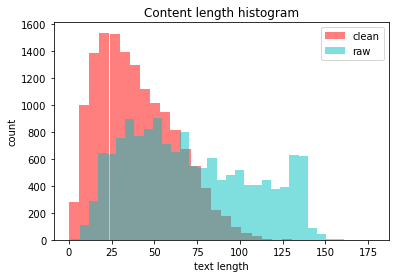

In [22]:
plt.figure()
plt.title('Content length histogram')
plt.hist(train_data.clean_content_length, bins=30, color='r', alpha=0.5)
plt.hist(train_data.content_length, bins=30, color='c', alpha=0.5)
plt.legend(['clean', 'raw'])
plt.xlabel('text length')
plt.ylabel('count')
plt.show()

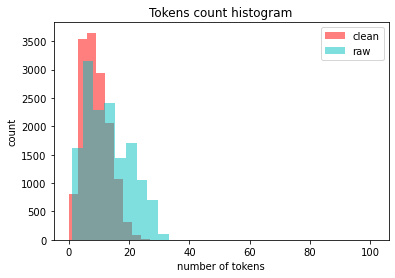

In [23]:
plt.figure()
plt.title('Tokens count histogram')
plt.hist(train_data.clean_word_count, bins=28, color='r', alpha=0.5)
plt.hist(train_data.word_count, bins=28, color='c', alpha=0.5)
plt.legend(['clean', 'raw'])
plt.xlabel('number of tokens')
plt.ylabel('count')
plt.show()

In [8]:
import nltk
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')
STOPWORDS = [x.lower().replace("'",'') for x in STOPWORDS]
STOPWORDS[:5]

['i', 'me', 'my', 'myself', 'we']

In [11]:
with open('stopwords.txt', 'w') as f:
    f.write('\n'.join(STOPWORDS))

In [14]:
with open('stopwords.txt', 'r') as f:
    STOPWORDS = [x.strip() for x in f.readlines()]
STOPWORDS

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

In [13]:
STOPWORDS

['i\n',
 'me\n',
 'my\n',
 'myself\n',
 'we\n',
 'our\n',
 'ours\n',
 'ourselves\n',
 'you\n',
 'youre\n',
 'youve\n',
 'youll\n',
 'youd\n',
 'your\n',
 'yours\n',
 'yourself\n',
 'yourselves\n',
 'he\n',
 'him\n',
 'his\n',
 'himself\n',
 'she\n',
 'shes\n',
 'her\n',
 'hers\n',
 'herself\n',
 'it\n',
 'its\n',
 'its\n',
 'itself\n',
 'they\n',
 'them\n',
 'their\n',
 'theirs\n',
 'themselves\n',
 'what\n',
 'which\n',
 'who\n',
 'whom\n',
 'this\n',
 'that\n',
 'thatll\n',
 'these\n',
 'those\n',
 'am\n',
 'is\n',
 'are\n',
 'was\n',
 'were\n',
 'be\n',
 'been\n',
 'being\n',
 'have\n',
 'has\n',
 'had\n',
 'having\n',
 'do\n',
 'does\n',
 'did\n',
 'doing\n',
 'a\n',
 'an\n',
 'the\n',
 'and\n',
 'but\n',
 'if\n',
 'or\n',
 'because\n',
 'as\n',
 'until\n',
 'while\n',
 'of\n',
 'at\n',
 'by\n',
 'for\n',
 'with\n',
 'about\n',
 'against\n',
 'between\n',
 'into\n',
 'through\n',
 'during\n',
 'before\n',
 'after\n',
 'above\n',
 'below\n',
 'to\n',
 'from\n',
 'up\n',
 'down\n',
 